In [1]:
from keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
Image_Size = [224, 224]
train_path = 'Dataset/Train'
test_path = 'Dataset/Test'

In [3]:
mobilnet = VGG19(input_shape=Image_Size+[3], weights='imagenet', include_top=False)

In [4]:
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
folders = glob('Dataset/Train/*')

In [6]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [7]:
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
model = Model(inputs=mobilnet.input, outputs = prediction)

In [10]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [11]:
from keras.layers import MaxPooling2D

In [12]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)            

In [13]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",metrics=["accuracy"])

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode = "categorical")

Found 416 images belonging to 2 classes.


In [16]:
training_set

In [17]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode = "categorical")

Found 134 images belonging to 2 classes.


In [18]:
r = model.fit_generator(training_set,validation_data=test_set,epochs=50,
                       steps_per_epoch=len(training_set),
                       validation_steps=len(test_set))

Epoch 1/50
13/13 [==============================] - 42s 3s/step - loss: 1.3371 - accuracy: 0.5337 - val_loss: 0.3006 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 40s 3s/step - loss: 0.6739 - accuracy: 0.6082 - val_loss: 0.6066 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 40s 3s/step - loss: 0.6087 - accuracy: 0.6755 - val_loss: 1.1086 - val_accuracy: 0.3209
Epoch 4/50
13/13 [==============================] - 37s 3s/step - loss: 0.5276 - accuracy: 0.7332 - val_loss: 0.9027 - val_accuracy: 0.4328
Epoch 5/50
13/13 [==============================] - 37s 3s/step - loss: 0.4951 - accuracy: 0.7452 - val_loss: 1.1275 - val_accuracy: 0.4104
Epoch 6/50
13/13 [==============================] - 37s 3s/step - loss: 0.4089 - accuracy: 0.8149 - val_loss: 0.8759 - val_accuracy: 0.4627
Epoch 7/50
13/13 [==============================] - 37s 3s/step - loss: 0.4201 - accuracy: 0.7837 - val_loss: 1.0626 - val_accuracy: 0.5075
Epoch 8/50
13/13 [==

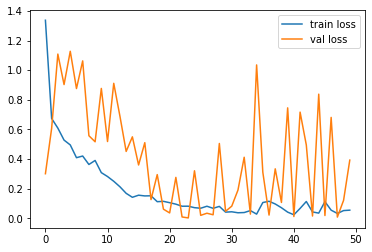

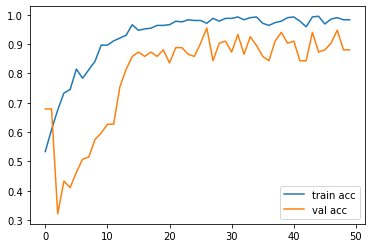

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from keras.models import load_model
model.save('model_vgg19.h5')

In [21]:
y_pred = model.predict(test_set)

In [22]:
y_pred

array([[9.19093098e-03, 9.90809083e-01],
       [9.99998569e-01, 1.42631586e-06],
       [9.99696732e-01, 3.03309498e-04],
       [4.28346060e-02, 9.57165420e-01],
       [2.76709022e-03, 9.97232974e-01],
       [1.12075107e-02, 9.88792479e-01],
       [1.11849301e-01, 8.88150692e-01],
       [1.12588638e-02, 9.88741100e-01],
       [9.95226979e-01, 4.77300165e-03],
       [1.91206448e-02, 9.80879366e-01],
       [9.99877572e-01, 1.22366779e-04],
       [3.60164978e-03, 9.96398330e-01],
       [1.00000000e+00, 7.51899445e-11],
       [2.38849944e-03, 9.97611523e-01],
       [1.00000000e+00, 1.68964717e-10],
       [4.08437073e-01, 5.91562867e-01],
       [1.00000000e+00, 3.55656672e-12],
       [2.53236853e-03, 9.97467637e-01],
       [9.99979496e-01, 2.05406704e-05],
       [9.27189648e-01, 7.28104413e-02],
       [3.60079467e-01, 6.39920473e-01],
       [9.99999166e-01, 8.00035707e-07],
       [1.08217686e-01, 8.91782284e-01],
       [1.00000000e+00, 8.34975367e-10],
       [8.771341

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0], dtype=int64)

In [25]:
from keras.models import load_model
from keras.preprocessing import image

In [26]:
model=load_model('model_vgg19.h5')

In [27]:
img=image.load_img('Dataset/Test/parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png',target_size=(224,224))

In [28]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [29]:
x.shape

(224, 224, 3)

In [30]:
x = x/255

In [31]:
x = np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [32]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data),axis=1)

In [34]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
